# Data Types Demonstration

This notebook demonstrates different data types and how to handle them.

**License:** MIT License  
**Copyright:** (c) 2024 Fabricio Batista Narcizo

## Import Required Libraries

Import the necessary libraries including pandas, numpy, and matplotlib.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Helper Function: Render DataFrame as Table

This function displays a DataFrame as a nicely formatted table with colored cells.

In [2]:
def render_mpl_table(
        data: pd.DataFrame, col_width: float = 4.0, row_height: float = 0.625,
        font_size: int = 14, header_color: str = "#179E86",
        row_colors: list = ["#f1f1f2", "#ffffff"], edge_color: str = "black",
        bbox: list = [0, 0, 1, 1], header_font_color: str = "white",
        ax: plt.Axes = None, **kwargs) -> plt.Axes:
    """Function to display the DataFrame as a table with colored cells.

    Args:
        data (pd.DataFrame): The DataFrame to be displayed as a table.
        col_width (float, optional): The width of the columns. Defaults to 4.0.
        row_height (float, optional): The height of the rows. Defaults to 0.625.
        font_size (int, optional): The font size. Defaults to 14.
        header_color (str, optional): The color of the header. Defaults to
            "#179E86".
        row_colors (list, optional): The colors of the rows. Defaults to
            ["#f1f1f2", "#ffffff"].
        edge_color (str, optional): The color of the edges. Defaults to "black".
        bbox (list, optional): The bounding box. Defaults to [0, 0, 1, 1].
        header_font_color (str, optional): The color of the header font.
            Defaults to "white".
        ax (plt.Axes, optional): The axes to be used. Defaults to None.

    Returns:
        plt.Axes: The axes with the table.
    """

    # Create the figure and axes if not provided.
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * \
            np.array([col_width, row_height])
        _, ax = plt.subplots(figsize=size)
        ax.axis("off")

    # Create the table.
    mpl_table = ax.table(
        cellText=data.values, bbox=bbox,
        colLabels=data.columns, **kwargs
    )

    # Set the font size.
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    # Styling the table.
    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)

        # Header row.
        if k[0] == 0:
            cell.set_text_props(weight="bold", color=header_font_color)
            cell.set_facecolor(header_color)

        # Alternate row coloring
        else:
            cell.set_facecolor(row_colors[k[0] % len(row_colors)])

    return ax

## Create Sample Dataset

Create a DataFrame to illustrate different data types including binary, nominal, ordinal, interval, and ratio data.

In [3]:
# Creating a DataFrame to illustrate different data types.
data = {
    # Numerical Data (Discrete).
    # Binary data (two possible values).
    "Binary_Choice": [0, 1, 0, 1, 1],
    # Nominal discrete data (IDs, no order).
    "Nominal_ID": [101, 102, 103, 101, 104],
    # Ordinal discrete data (ratings with a meaningful order)
    "Ordinal_Rating": [1, 3, 2, 5, 4],

    # Numerical Data (Continuous).
    # Interval data (temperature with no true zero point).
    "Temperature_C": [36.6, 37.1, 38.5, 36.8, 37.0],
    # Ratio data (Income with a true zero point).
    "Income_USD": [25000, 48000, 120000, 34000, 56000],

    # Categorical Data.
    # Ordinal categorical data (has a meaningful order).
    # Nominal categorical data (no order).
    "Education_Level": ["High School", "Bachelor", "Master", "Bachelor", "PhD"],
    "Gender": ["Male", "Female", "Female", "Male", "Female"]
}

df = pd.DataFrame(data)
print("Illustrating Different Data Types:\n")
print(df)

Illustrating Different Data Types:

   Binary_Choice  Nominal_ID  Ordinal_Rating  Temperature_C  Income_USD  \
0              0         101               1           36.6       25000   
1              1         102               3           37.1       48000   
2              0         103               2           38.5      120000   
3              1         101               5           36.8       34000   
4              1         104               4           37.0       56000   

  Education_Level  Gender  
0     High School    Male  
1        Bachelor  Female  
2          Master  Female  
3        Bachelor    Male  
4             PhD  Female  


## Data Type Analysis

Let's examine each type of data in our dataset and understand their characteristics.

In [4]:
# Explaining Data Types.
print("\nData Type Explanation:")

# Binary (Discrete).
print("\nBinary Data (Discrete):")
print(df[["Binary_Choice"]])


Data Type Explanation:

Binary Data (Discrete):
   Binary_Choice
0              0
1              1
2              0
3              1
4              1


In [5]:
# Nominal Data (Discrete and Categorical).
print("\nNominal Data (Discrete and Categorical):")
print(df[["Nominal_ID", "Gender"]])


Nominal Data (Discrete and Categorical):
   Nominal_ID  Gender
0         101    Male
1         102  Female
2         103  Female
3         101    Male
4         104  Female


In [6]:
# Ordinal Data (Discrete and Categorical).
print("\nOrdinal Data (Discrete and Categorical):")
print(df[["Ordinal_Rating", "Education_Level"]])


Ordinal Data (Discrete and Categorical):
   Ordinal_Rating Education_Level
0               1     High School
1               3        Bachelor
2               2          Master
3               5        Bachelor
4               4             PhD


In [7]:
# Continuous Data (Interval and Ratio).
print("\nInterval Data (Continuous - Temperature):")
print(df[["Temperature_C"]])

print("\nRatio Data (Continuous - Income):")
print(df[["Income_USD"]])


Interval Data (Continuous - Temperature):
   Temperature_C
0           36.6
1           37.1
2           38.5
3           36.8
4           37.0

Ratio Data (Continuous - Income):
   Income_USD
0       25000
1       48000
2      120000
3       34000
4       56000


## Visualize Data as Table

Display the complete dataset as a formatted table using our custom rendering function.

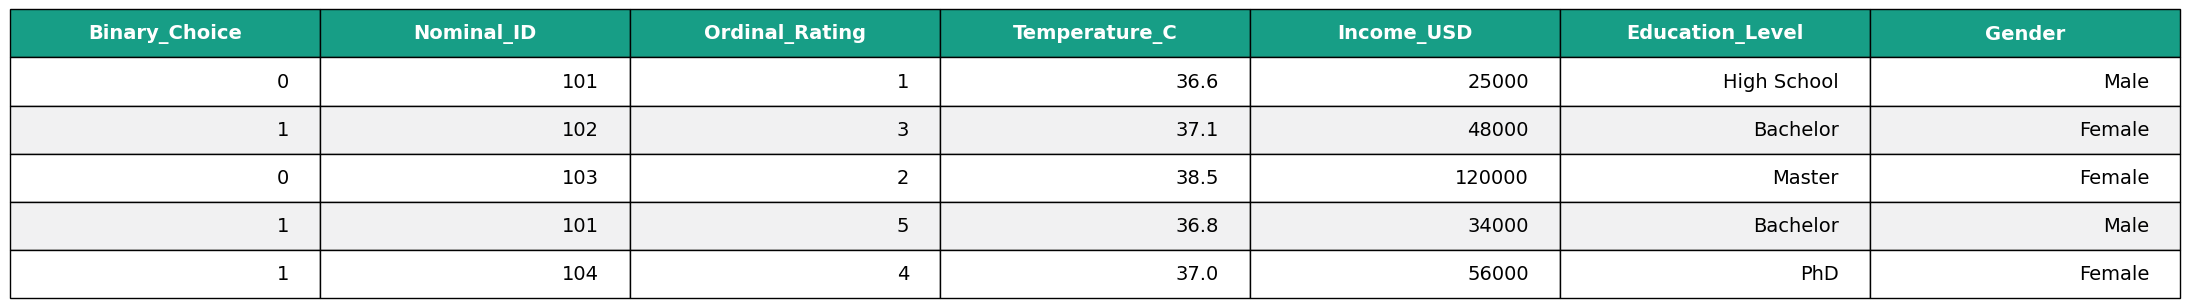

In [8]:
# Render the table.
render_mpl_table(df)
plt.show()